1.Frecuencia de Uso del Servicio: 
Analizar con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de Business Payments a lo largo del tiempo.

In [2]:
#ahora cargo y previsualizo el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo CSV
file_path = '../dataset/extract-cashrequest-data analyst.csv'

# Cargo dataset
df = pd.read_csv(file_path)

# Convierto las columnas de fechas al tipo datetime
date_columns = [
    'created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 
    'cash_request_received_date', 'money_back_date', 'send_at', 
    'reco_creation', 'reco_last_update'
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Vista previa del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())


Primeras filas del dataset:
     id  amount    status                       created_at  \
0     5   100.0  rejected 2019-12-10 19:05:21.596873+00:00   
1    70   100.0  rejected 2019-12-10 19:50:12.347780+00:00   
2     7   100.0  rejected 2019-12-10 19:13:35.825460+00:00   
3    10    99.0  rejected 2019-12-10 19:16:10.880172+00:00   
4  1594   100.0  rejected 2020-05-06 09:59:38.877376+00:00   

                        updated_at  user_id                     moderated_at  \
0 2019-12-11 16:47:42.407830+00:00    804.0 2019-12-11 16:47:42.405646+00:00   
1 2019-12-11 14:24:22.900054+00:00    231.0 2019-12-11 14:24:22.897988+00:00   
2 2019-12-11 09:46:59.779773+00:00    191.0 2019-12-11 09:46:59.777728+00:00   
3 2019-12-18 14:26:18.136163+00:00    761.0 2019-12-18 14:26:18.128407+00:00   
4 2020-05-07 09:21:55.340080+00:00   7686.0 2020-05-07 09:21:55.320193+00:00   

   deleted_account_id               reimbursement_date  \
0                 NaN 2020-01-09 19:05:21.596363+00:00   
1 

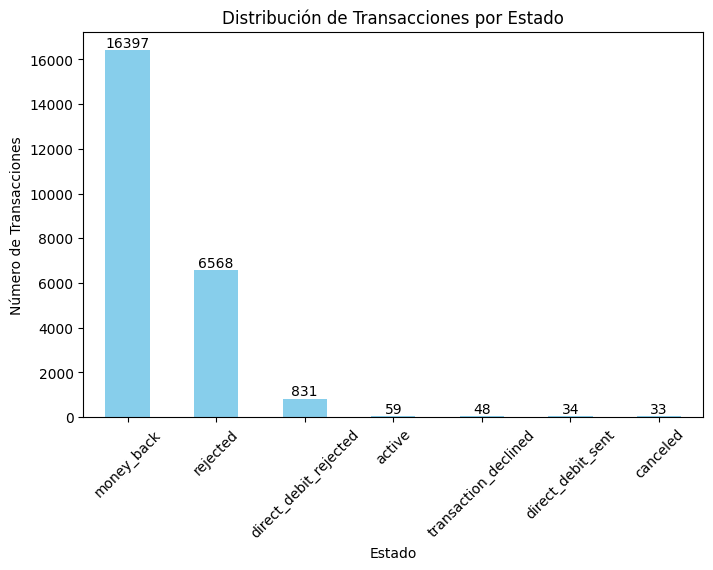


count    2.397000e+04
mean     1.819425e+03
std      1.633700e+03
min      3.055556e-09
25%      2.015635e+01
50%      1.508277e+03
75%      2.922548e+03
max      1.016877e+04
Name: time_to_update, dtype: float64


In [3]:


# Cuento las ocurrencias de cada estado
status_counts = df['status'].value_counts()

# Visualizo
plt.figure(figsize=(8, 5))

#status_counts.plot(kind='bar', color='skyblue')
ax = status_counts.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0])

plt.title("Distribución de Transacciones por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de Transacciones")
plt.xticks(rotation=45)

plt.show()


#Notas a tener en cuenta
#status: Verificar las proporciones de cada valor (como rejected, money_back, etc.).
#transfer_type: Revisar cuántos registros tienen instant frente a regular.
#Campos de fecha (created_at, updated_at, etc.): Analizar los intervalos entre fechas clave como created_at y updated_at.

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['time_to_update'] = (df['updated_at'] - df['created_at']).dt.total_seconds() / 3600
print("")
print(df['time_to_update'].describe())



C:\Users\User\AppData\Local\Temp\ipykernel_12356\2640651541.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['transaction_month'] = df['created_at'].dt.to_period('M')


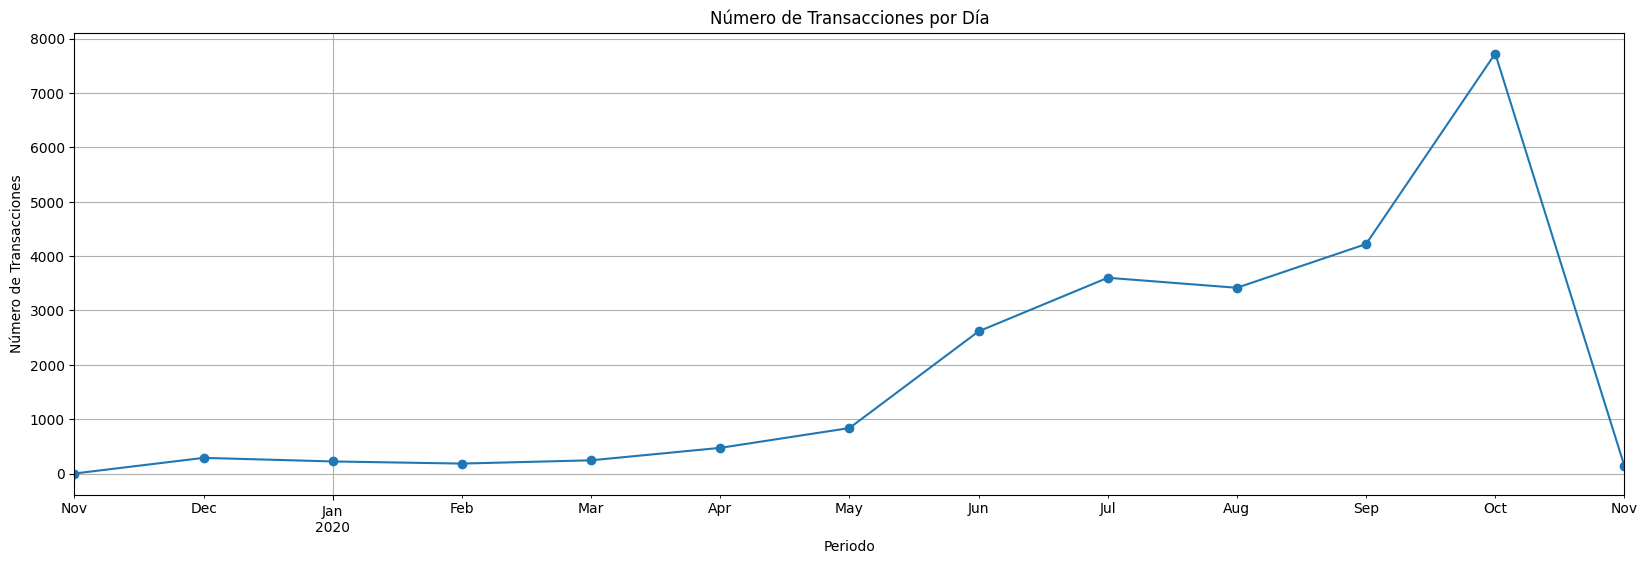

In [4]:
#Ahora analizamos la distribución temporal de transacciones

#POR DIA
# Agrego columna con solo la fecha (sin hora)
#df['transaction_date'] = df['created_at'].dt.date
# Contamos transacciones por día
#transactions_per_day = df.groupby('transaction_date')['id'].count()

#POR MES
# Crear una nueva columna para el mes y el año
df['transaction_month'] = df['created_at'].dt.to_period('M')
# Contamos las transacciones por mes
transactions_per_period = df.groupby('transaction_month')['id'].count()


#POR TRIM
# Crear una nueva columna para el trimestre
#df['transaction_quarter'] = df['created_at'].dt.to_period('Q')
# Contamos las transacciones por trimestre
#transactions_per_period = df.groupby('transaction_quarter')['id'].count()


# Mostramos en el gráfico
plt.figure(figsize=(20,6))
transactions_per_period.plot(kind='line', marker='o')
plt.title("Número de Transacciones por Día")
plt.xlabel("Periodo")
plt.ylabel("Número de Transacciones")
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12356\2443900875.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


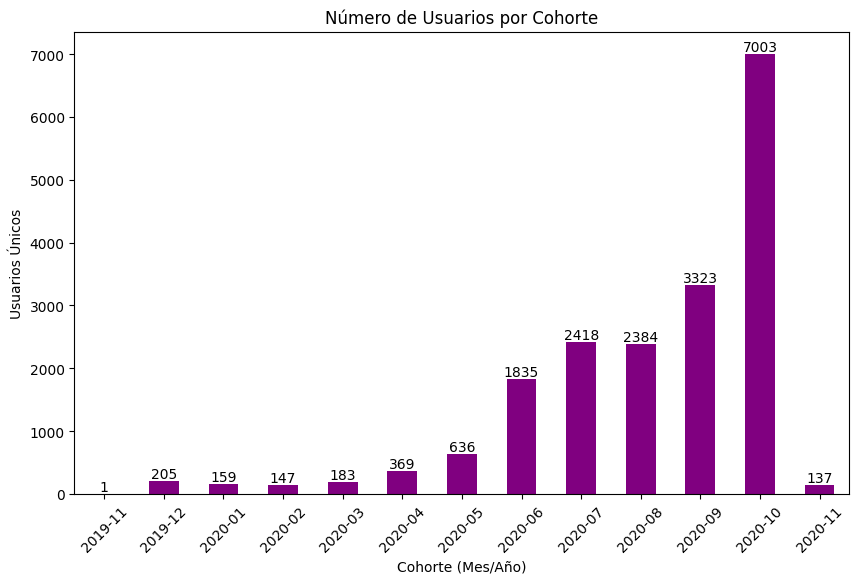

In [5]:
# Creo cohortes mensuales
df['cohort'] = df['created_at'].dt.to_period('M')

# Número de usuarios únicos por cohorte
cohort_users = df.groupby('cohort')['user_id'].nunique()

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cohort_users.plot(kind='bar', color='purple')

ax.bar_label(ax.containers[0])
plt.title("Número de Usuarios por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Usuarios Únicos")
plt.xticks(rotation=45)

plt.show()


Métricas Iniciales para el Proyecto
Las métricas iniciales a calcular y analizar para comenzar el proyecto son las siguientes:

1. Frecuencia de Uso del Servicio: Analizar con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de Business Payments a lo largo del tiempo.

2. Tasa de Incidentes: Determinar la tasa de incidentes, especialmente aquellos relacionados con problemas de pago, en cada cohorte. Identificar variaciones significativas entre cohortes.

3. Ingresos Generados por Cohorte: Calcular el total de ingresos generados por cada cohorte a lo largo del tiempo para evaluar el impacto financiero del comportamiento de los usuarios.

4. Métricas Acumuladas por Cohorte: Proponer y calcular métricas acumuladas que proporcionen perspectivas adicionales para la extracción de insights accionables.

        user_id   cohort  transaction_count
0          34.0  2020-04                  1
1          35.0  2019-12                  2
2          35.0  2020-01                  1
3          35.0  2020-02                  1
4          35.0  2020-03                  1
...         ...      ...                ...
18795  103425.0  2020-11                  1
18796  103437.0  2020-11                  1
18797  103496.0  2020-11                  1
18798  103503.0  2020-11                  1
18799  103719.0  2020-11                  1

[18800 rows x 3 columns]
cohort
2019-11    1.000000
2019-12    1.121951
2020-01    1.106918
2020-02    1.068027
2020-03    1.131148
2020-04    1.132791
2020-05    1.143082
2020-06    1.226703
2020-07    1.306452
2020-08    1.296141
2020-09    1.144147
2020-10    1.072683
2020-11    1.000000
Freq: M, Name: transaction_count, dtype: float64


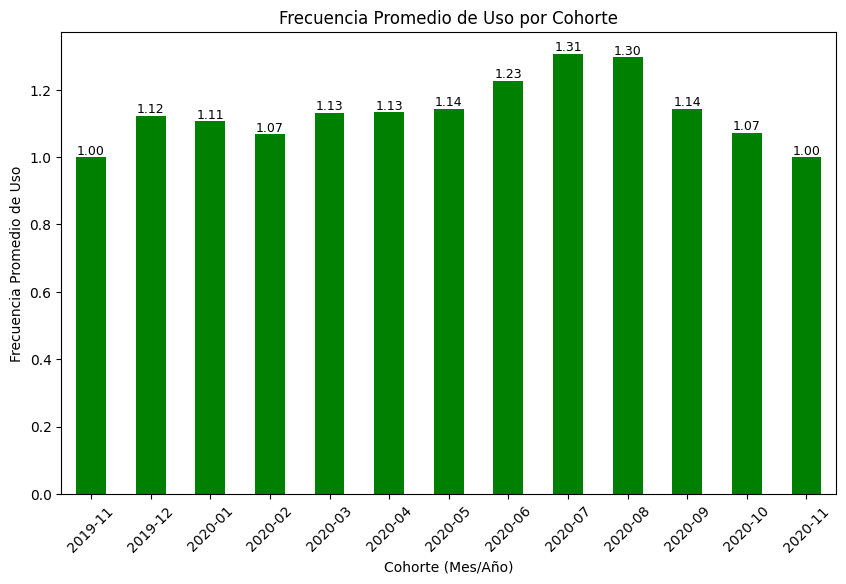

In [6]:

# Cálculo de Métricas Iniciales

#1.Frecuencia de uso del servicio
import matplotlib.pyplot as plt

# Agrupo por usuario y cohorte para calcular frecuencia
usage_data = df.groupby(['user_id', 'cohort']).size().reset_index(name='transaction_count')

# Promedio de transacciones por cohorte
average_usage = usage_data.groupby('cohort')['transaction_count'].mean()

print(usage_data)
print(average_usage)

# Creo el gráfico
plt.figure(figsize=(10, 6))
ax = average_usage.plot(kind='bar', color='green')

# Formateo los valores con 2 decimales y añado a las barras
formatted_labels = [f"{v:.2f}" for v in average_usage]
ax.bar_label(ax.containers[0], labels=formatted_labels, fontsize=9)

# Ajusto título y etiquetas
plt.title("Frecuencia Promedio de Uso por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Frecuencia Promedio de Uso")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()





C:\Users\User\AppData\Local\Temp\ipykernel_12356\1972629896.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


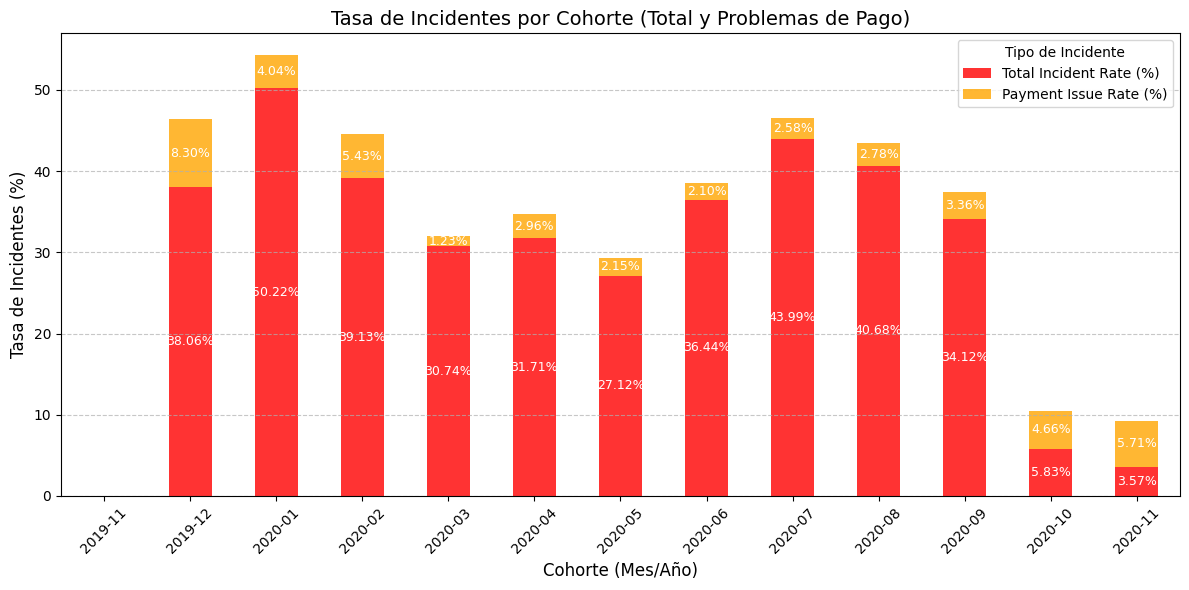

Tasas de Incidentes por Cohorte:

         Total Incident Rate (%)  Payment Issue Rate (%)
cohort                                                  
2019-11                 0.000000                0.000000
2019-12                38.062284                8.304498
2020-01                50.224215                4.035874
2020-02                39.130435                5.434783
2020-03                30.737705                1.229508
2020-04                31.712474                2.959831
2020-05                27.120669                2.150538
2020-06                36.443595                2.103250
2020-07                43.987781                2.582616
2020-08                40.678958                2.780217
2020-09                34.115139                3.364132
2020-10                 5.825243                4.660194
2020-11                 3.571429                5.714286


In [7]:
# 2.Tasa de Incidentes

import pandas as pd
import matplotlib.pyplot as plt

# Aseguro que 'created_at' tenga formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Creo la columna 'cohort' (por mes y año)
df['cohort'] = df['created_at'].dt.to_period('M')

# Filtro datos relacionados con problemas de pago (asumimos 'reason' define el tipo de rechazo)
payment_issues = ['direct_debit_rejected', 'pending_direct_debit']  # Ajusto según los valores específicos en los datos
df['payment_issue'] = df['status'].isin(payment_issues)

# Total de incidentes por cohorte
incident_data = df[df['status'] == 'rejected']
total_incidents_by_cohort = incident_data.groupby('cohort')['id'].count()

# Incidentes relacionados con problemas de pago por cohorte
payment_incidents_by_cohort = df[df['payment_issue']].groupby('cohort')['id'].count()

# Total de transacciones por cohorte
total_transactions_by_cohort = df.groupby('cohort')['id'].count()

# Cálculo de tasas
total_incident_rate = (total_incidents_by_cohort / total_transactions_by_cohort) * 100  # Tasa de todos los incidentes
payment_issue_rate = (payment_incidents_by_cohort / total_transactions_by_cohort) * 100  # Tasa de problemas de pago

# Combino resultados en un DataFrame para visualización
rates_df = pd.DataFrame({
    'Total Incident Rate (%)': total_incident_rate,
    'Payment Issue Rate (%)': payment_issue_rate
}).fillna(0)  # Llenar NaN con 0 para cohortes sin incidentes

# Creo el gráfico de barras apiladas
ax = rates_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'orange'], alpha=0.8)

# Personalizo gráfico
plt.title("Tasa de Incidentes por Cohorte (Total y Problemas de Pago)", fontsize=14)
plt.xlabel("Cohorte (Mes/Año)", fontsize=12)
plt.ylabel("Tasa de Incidentes (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Incidente")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrego valores a las barras
for idx, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Solo agrego texto a las barras no vacías
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición horizontal
                bar.get_height() / 2 + bar.get_y(),  # Posición vertical en la mitad de la barra
                f'{height:.2f}%',  # Formateo a dos decimales y porcentaje
                ha='center', va='center', fontsize=9, color='white'
            )

# Vamos con el gráfico ajustado
plt.tight_layout()
plt.show()

# Muestro la tabla de tasas
print("Tasas de Incidentes por Cohorte:\n")
print(rates_df)



cohort
2019-11         1.0
2019-12     27297.0
2020-01     21587.0
2020-02     16653.0
2020-03     23549.0
2020-04     46093.0
2020-05     79236.0
2020-06    246026.0
2020-07    328187.0
2020-08    287633.0
2020-09    336507.0
2020-10    559339.0
2020-11     10710.0
Freq: M, Name: amount, dtype: float64


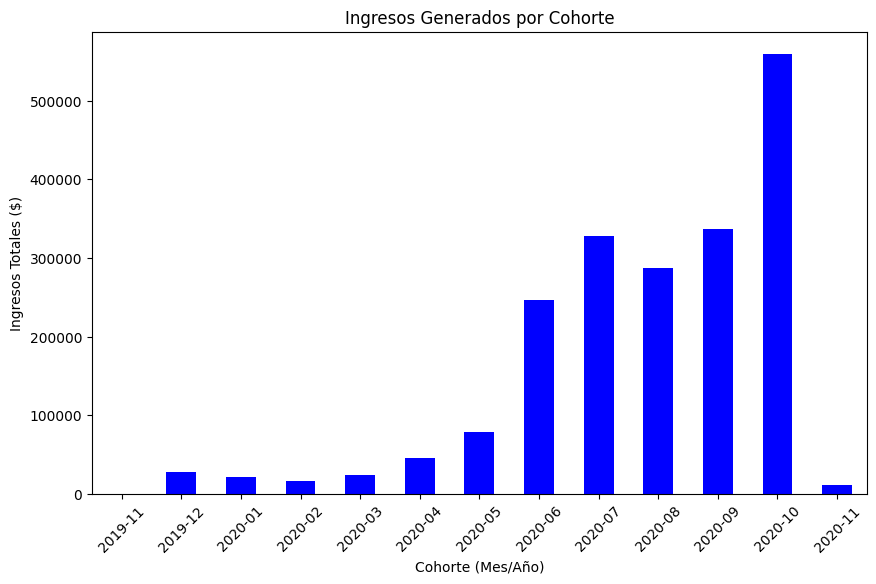

In [8]:
#3. Ingresos generados por cohorte

# Calcular ingresos totales por cohorte
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convertir 'amount' a numérico
revenue_data = df.groupby('cohort')['amount'].sum()

print(revenue_data)

# Visualizar
plt.figure(figsize=(10, 6))
revenue_data.plot(kind='bar', color='blue')
plt.title("Ingresos Generados por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Ingresos Totales ($)")
plt.xticks(rotation=45)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13144\1634637781.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


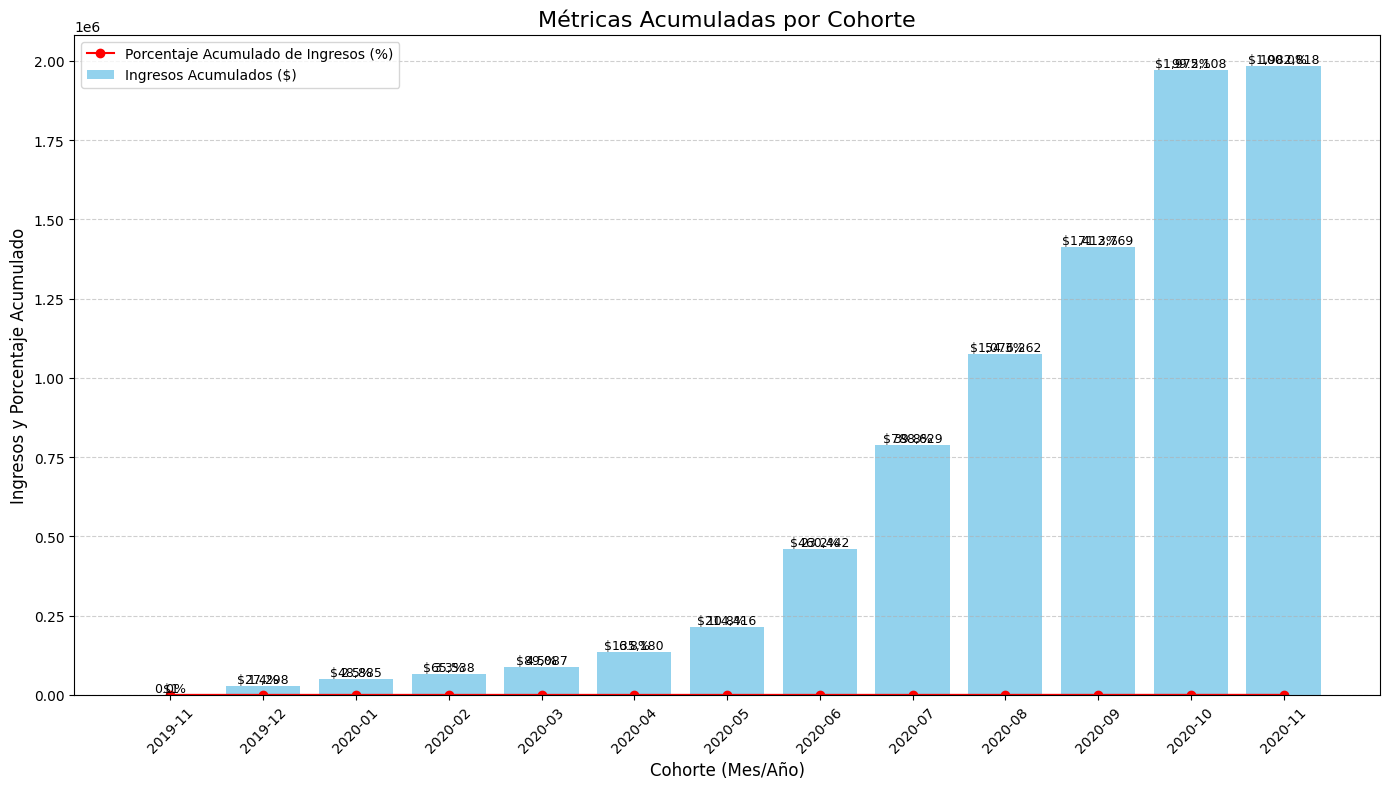

Métricas Acumuladas por Cohorte:

         Total Revenue  Cumulative Revenue  Cumulative Transactions  \
cohort                                                                
2019-11            1.0                 1.0                        1   
2019-12        27297.0             27298.0                      290   
2020-01        21587.0             48885.0                      513   
2020-02        16653.0             65538.0                      697   
2020-03        23549.0             89087.0                      941   
2020-04        46093.0            135180.0                     1414   
2020-05        79236.0            214416.0                     2251   
2020-06       246026.0            460442.0                     4866   
2020-07       328187.0            788629.0                     8467   
2020-08       287633.0           1076262.0                    11884   
2020-09       336507.0           1412769.0                    16105   
2020-10       559339.0           1972108.0 

In [48]:
# 4.Métricas Acumuladas por Cohorte

import pandas as pd
import matplotlib.pyplot as plt

# Convierto 'created_at' a datetime y crear columna de cohortes
df['created_at'] = pd.to_datetime(df['created_at'])
df['cohort'] = df['created_at'].dt.to_period('M')

# Convierto 'amount' a numérico
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Calculo métricas acumuladas:
# 1. Total de ingresos acumulados por cohorte
revenue_by_cohort = df.groupby('cohort')['amount'].sum().sort_index()
cumulative_revenue = revenue_by_cohort.cumsum()

# 2. Número acumulado de transacciones por cohorte
transactions_by_cohort = df.groupby('cohort')['id'].count().sort_index()
cumulative_transactions = transactions_by_cohort.cumsum()

# 3. Porcentaje acumulado de ingresos sobre el total
total_revenue = revenue_by_cohort.sum()
cumulative_revenue_percentage = (cumulative_revenue / total_revenue) * 100

# Combino métricas en un DataFrame para que sea más fácil el acceso
metrics_df = pd.DataFrame({
    'Total Revenue': revenue_by_cohort,
    'Cumulative Revenue': cumulative_revenue,
    'Cumulative Transactions': cumulative_transactions,
    'Cumulative Revenue %': cumulative_revenue_percentage
}).fillna(0)

# Gráfico de métricas acumuladas
plt.figure(figsize=(14, 8))
bars = plt.bar(metrics_df.index.astype(str), metrics_df['Cumulative Revenue'], color='skyblue', alpha=0.9, label='Ingresos Acumulados ($)')
plt.plot(metrics_df.index.astype(str), metrics_df['Cumulative Revenue %'], color='red', marker='o', label='Porcentaje Acumulado de Ingresos (%)')

# Muestro valores encima de las barras y líneas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

for i, pct in enumerate(metrics_df['Cumulative Revenue %']):
    plt.text(i, metrics_df['Cumulative Revenue'].iloc[i], f'{pct:.1f}%', color='black', ha='center', va='bottom', fontsize=9)

# Personalizo del gráfico
plt.title("Métricas Acumuladas por Cohorte", fontsize=16)
plt.xlabel("Cohorte (Mes/Año)", fontsize=12)
plt.ylabel("Ingresos y Porcentaje Acumulado", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Muestro métricas en tabla
print("Métricas Acumuladas por Cohorte:\n")
print(metrics_df)


Calidad de los datos:
                        Column  Non_Null_Count  Non_Null_Percentage  \
7           deleted_account_id            2104             8.777639   
13             recovery_status            3330            13.892365   
14               reco_creation            3330            13.892365   
15            reco_last_update            3330            13.892365   
6                 moderated_at           16035            66.896120   
9   cash_request_received_date           16289            67.955778   
10             money_back_date           16543            69.015436   
12                     send_at           16641            69.424280   
5                      user_id           21867            91.226533   
0                           id           23970           100.000000   
1                       amount           23970           100.000000   
2                       status           23970           100.000000   
3                   created_at           23970         

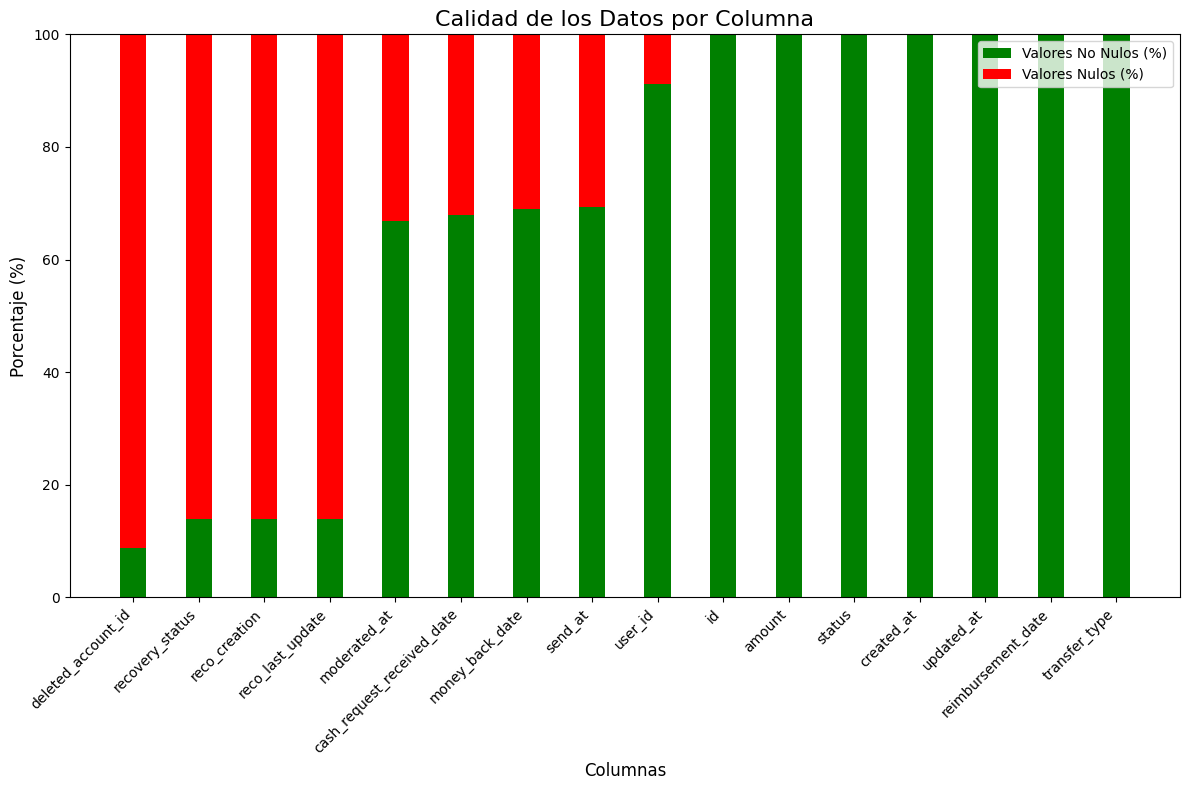

In [ ]:
#Control de datos/calidad

import pandas as pd
import matplotlib.pyplot as plt

# Cargo el archivo CSV
file_path = "dataset/extract - cash request - data analyst.csv"  # Reemplaza esto con la ruta real de tu archivo CSV
df = pd.read_csv(file_path)

# Conteo de valores no nulos y nulos
total_rows = len(df)
null_counts = df.isnull().sum()
non_null_counts = total_rows - null_counts

# Creo DataFrame resumen con información de valores correctos y nulos
data_quality_summary = pd.DataFrame({
    'Column': df.columns,
    'Non_Null_Count': non_null_counts.values,
    'Non_Null_Percentage': (non_null_counts.values / total_rows) * 100,
    'Null_Count': null_counts.values,
    'Null_Percentage': (null_counts.values / total_rows) * 100
}).sort_values(by='Null_Count', ascending=False)

# Muestro el resumen en una tabla
print("Calidad de los datos:")
print(data_quality_summary)

# Exporto a un archivo CSV (opcional)
#output_path = "data_quality_summary.csv"
#data_quality_summary.to_csv(output_path, index=False)

# Gráfico para visualizar la calidad de los datos
plt.figure(figsize=(12, 8))
# Agrupo barras de valores nulos y no nulos
width = 0.4
x = range(len(data_quality_summary))

plt.bar(x, data_quality_summary['Non_Null_Percentage'], width, label='Valores No Nulos (%)', color='green')
plt.bar(x, data_quality_summary['Null_Percentage'], width, bottom=data_quality_summary['Non_Null_Percentage'], label='Valores Nulos (%)', color='red')

# Etiqueto
plt.title("Calidad de los Datos por Columna", fontsize=16)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(x, data_quality_summary['Column'], rotation=45, ha='right')
plt.legend()

# Muestro el gráfico
plt.tight_layout()
plt.show()


Análisis de Calidad de Datos  (opción 2)


Valores faltantes por columna:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   8058
deleted_account_id            21866
reimbursement_date            20920
cash_request_received_date     7681
money_back_date               11930
transfer_type                     0
send_at                        7504
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
time_to_update                    0
transaction_month                 0
cohort                            0
payment_issue                     0
dtype: int64


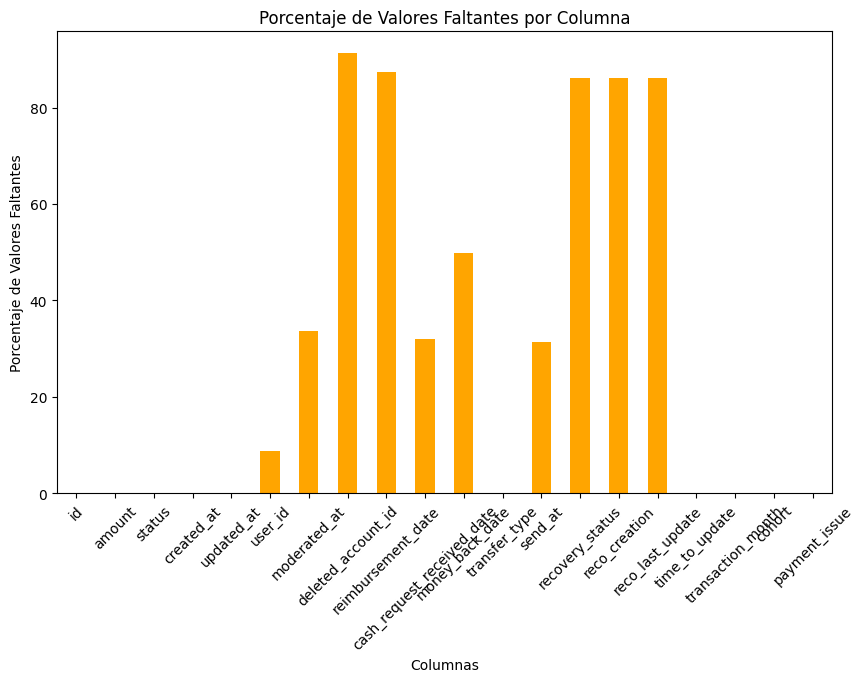

In [49]:
#vemos valores faltantes

print("\nValores faltantes por columna:")
missing_data = df.isnull().sum()
print(missing_data)

# Visualizar porcentaje de valores faltantes
missing_percentage = (missing_data / len(df)) * 100
missing_percentage.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Porcentaje de Valores Faltantes por Columna")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de Valores Faltantes")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#controlamos duplicados  (ERROR?)

duplicates_count = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates_count}")



Número de filas duplicadas: 0
